In [ ]:
!pip install pyclustertend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=24903313 sha256=18182df081ac23de5bd44980fba368f12c0c2e532bcfff087447a5be00f16a75
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.
mlxtend 

In [ ]:
import pandas as pd #
import seaborn as sns #
import matplotlib.pyplot as plt #
from sklearn.preprocessing import MinMaxScaler#
import numpy as np #
from pyclustertend import hopkins
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('drive/MyDrive/I.A/BasesDatos/E-com_Data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [ ]:
df = df.drop("Sold as set",axis=1)
df = df.drop("Reason of return",axis=1)
df = df.drop("CustomerID",axis=1)
df = df.drop("InvoieNo",axis=1)
le = LabelEncoder()
df['Cancelled_status'] = le.fit_transform(df['Cancelled_status'])

In [ ]:
df['Shipping Location'] = le.fit_transform(df['Shipping Location'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Item Code          537979 non-null  object        
 1   Date of purchase   537979 non-null  datetime64[ns]
 2   Quantity           537979 non-null  int64         
 3   Time               537979 non-null  object        
 4   price per Unit     537979 non-null  float64       
 5   Price              537979 non-null  float64       
 6   Shipping Location  537979 non-null  int64         
 7   Cancelled_status   537979 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 32.8+ MB


In [ ]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])
df['year'] = df['Date of purchase'].apply(lambda date: date.year)
df['month'] = df['Date of purchase'].apply(lambda date: date.month)
df['day'] = df['Date of purchase'].apply(lambda date: date.day)
df = df.drop('Date of purchase',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Item Code          537979 non-null  object 
 1   Quantity           537979 non-null  int64  
 2   Time               537979 non-null  object 
 3   price per Unit     537979 non-null  float64
 4   Price              537979 non-null  float64
 5   Shipping Location  537979 non-null  int64  
 6   Cancelled_status   537979 non-null  int64  
 7   year               537979 non-null  int64  
 8   month              537979 non-null  int64  
 9   day                537979 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 41.0+ MB


In [ ]:
col_aux=pd.to_numeric(df['Item Code'],errors='coerce').fillna(df['Item Code'])

In [ ]:
col_aux

0         15734.0
1         14616.0
2         14614.0
3          85014B
4         15364.0
           ...   
537974     85194L
537975    14693.0
537976    14693.0
537977     85194L
537978    14693.0
Name: Item Code, Length: 537979, dtype: object

In [ ]:
df['Item Code'] = df['Item Code'].astype(str)

In [ ]:
df['Item Code'] = le.fit_transform(df['Item Code'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Item Code          537979 non-null  int64  
 1   Quantity           537979 non-null  int64  
 2   Time               537979 non-null  object 
 3   price per Unit     537979 non-null  float64
 4   Price              537979 non-null  float64
 5   Shipping Location  537979 non-null  int64  
 6   Cancelled_status   537979 non-null  int64  
 7   year               537979 non-null  int64  
 8   month              537979 non-null  int64  
 9   day                537979 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 41.0+ MB


In [ ]:
df = df.drop('Time',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Item Code          537979 non-null  int64  
 1   Quantity           537979 non-null  int64  
 2   price per Unit     537979 non-null  float64
 3   Price              537979 non-null  float64
 4   Shipping Location  537979 non-null  int64  
 5   Cancelled_status   537979 non-null  int64  
 6   year               537979 non-null  int64  
 7   month              537979 non-null  int64  
 8   day                537979 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 36.9 MB


<Axes: >

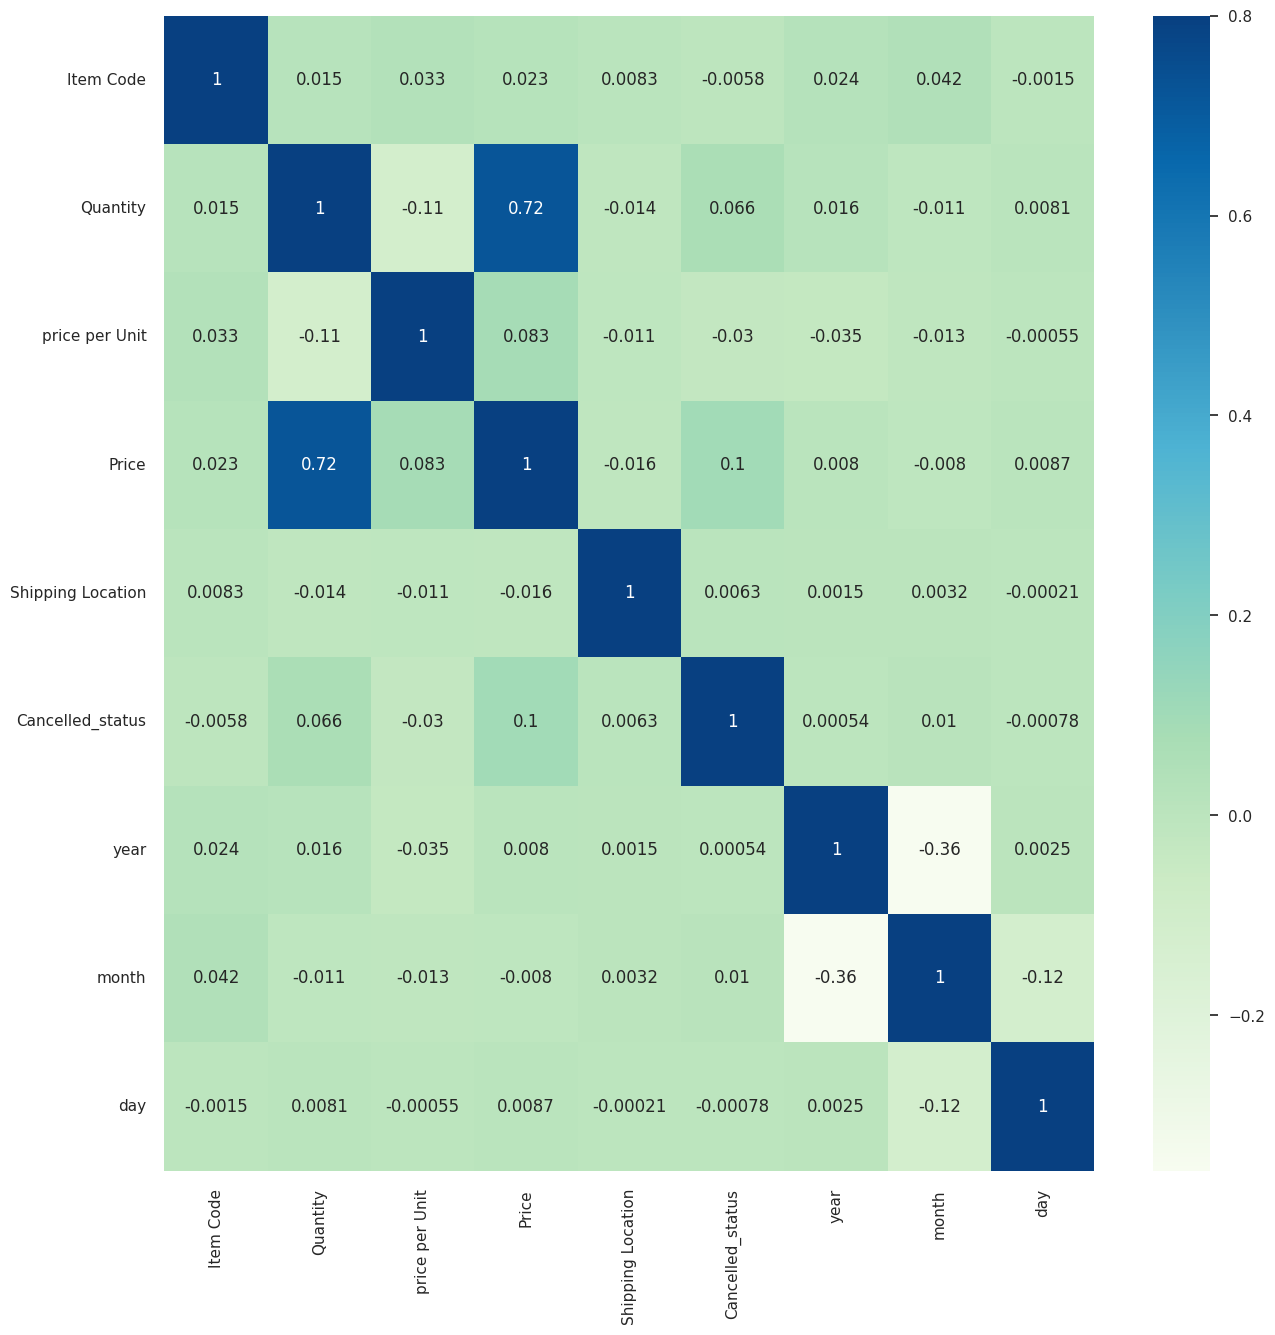

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmax=0.8,cmap="GnBu",annot=True)

In [ ]:
df = df.drop('Price',axis=1)

In [ ]:
f = df.columns[:]

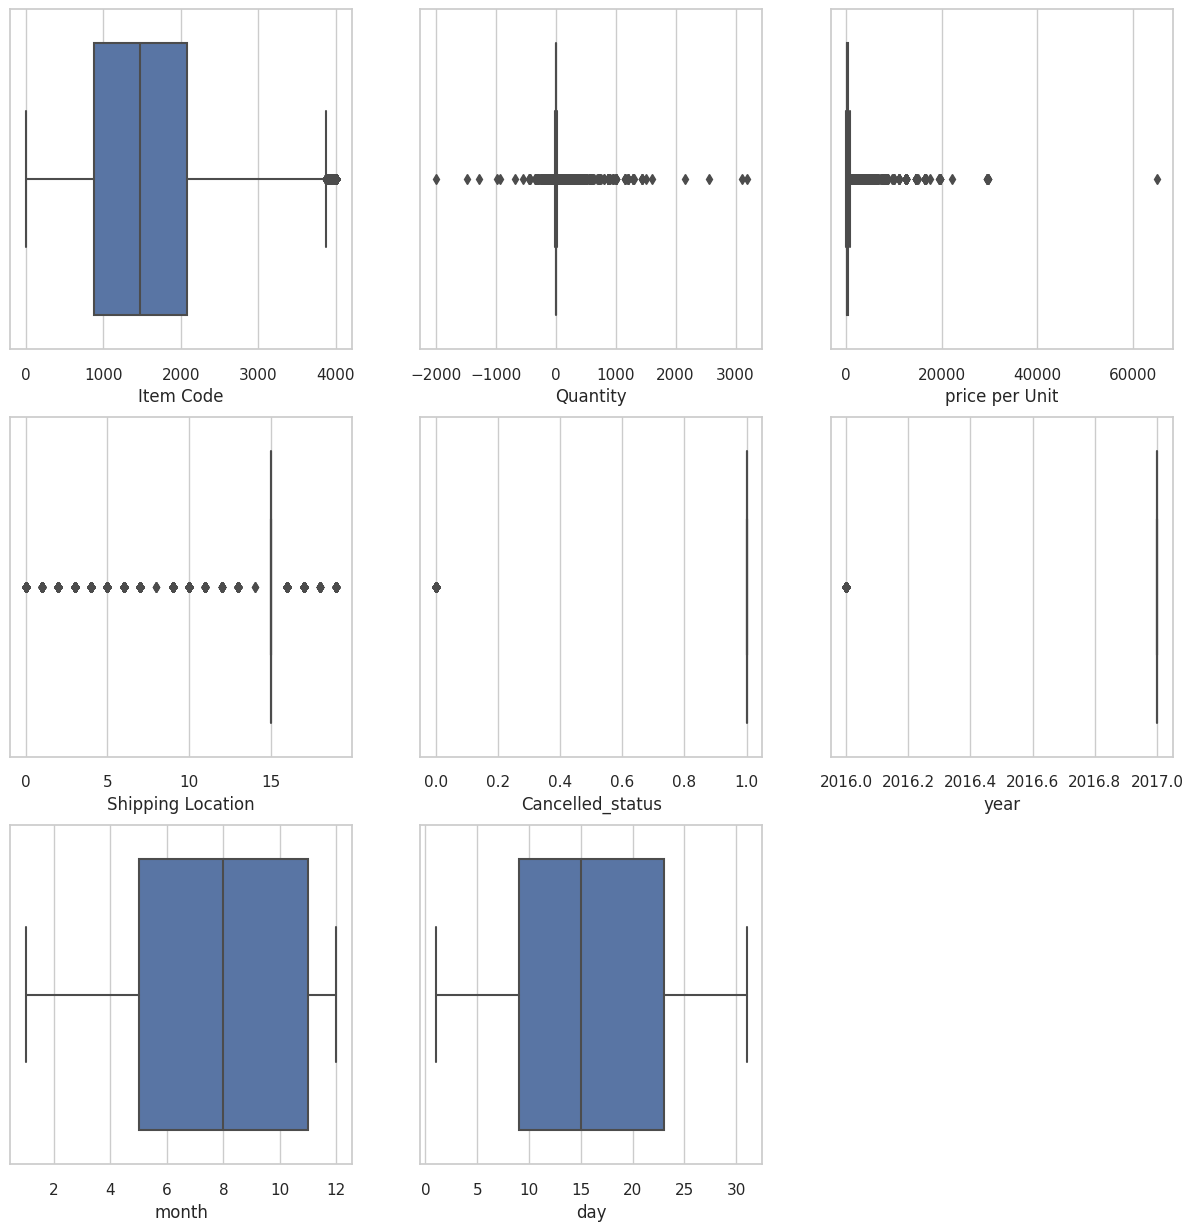

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [ ]:
for i in f:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-41-229d9e95d654>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-41-229d9e95d654>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4
<ipython-input-41-229d9e95d654>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-41-229d9e95d654>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

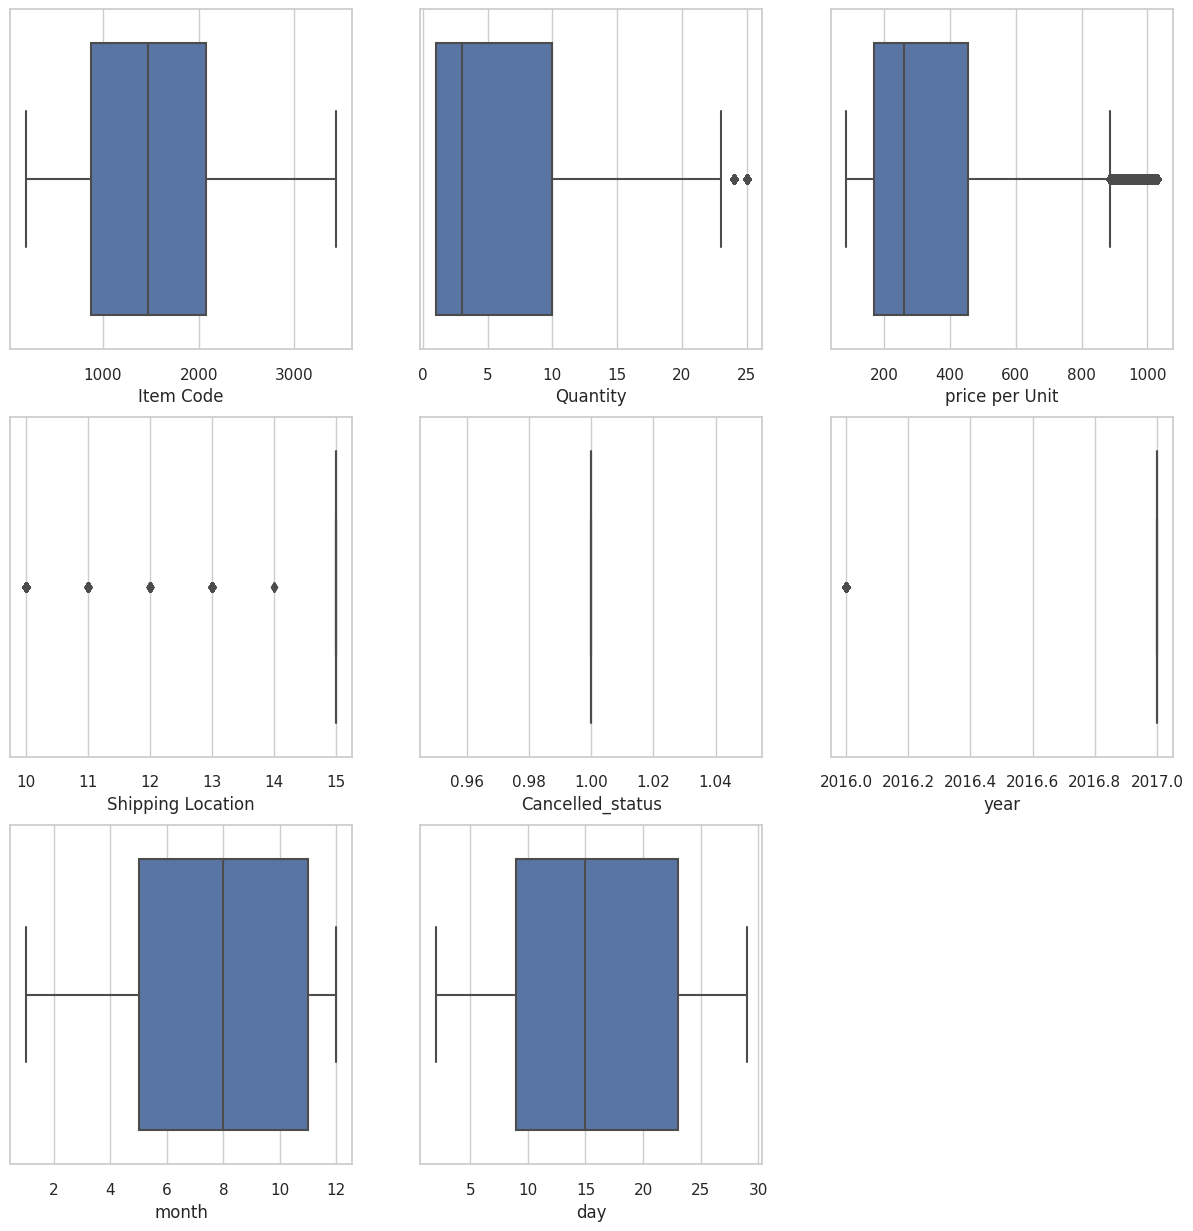

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [ ]:
df.describe()

,Item Code,Quantity,price per Unit,Shipping Location,Cancelled_status,year,month,day
count,537979.000000,537979.000000,537979.000000,537979.000000,537979.0,537979.000000,537979.000000,537979.000000
mean,1571.240162,6.728489,352.279792,14.677452,1.0,2016.921952,7.711150,15.616078
std,906.963693,7.392272,256.842967,1.227120,0.0,0.268247,3.512054,8.348843
min,194.000000,1.000000,85.000000,10.000000,1.0,2016.000000,1.000000,2.000000
25%,880.000000,1.000000,169.000000,15.000000,1.0,2017.000000,5.000000,9.000000
50%,1474.000000,3.000000,261.000000,15.000000,1.0,2017.000000,8.000000,15.000000
75%,2079.000000,10.000000,456.000000,15.000000,1.0,2017.000000,11.000000,23.000000
max,3437.100000,25.000000,1029.000000,15.000000,1.0,2017.000000,12.000000,29.000000


In [ ]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)

In [ ]:
hopkins(df2,df2.shape[0]) # 0 el mejor, 0.5 el peor Con escalado

0.04544278975967578

In [ ]:
df2 = pd.DataFrame(df2)

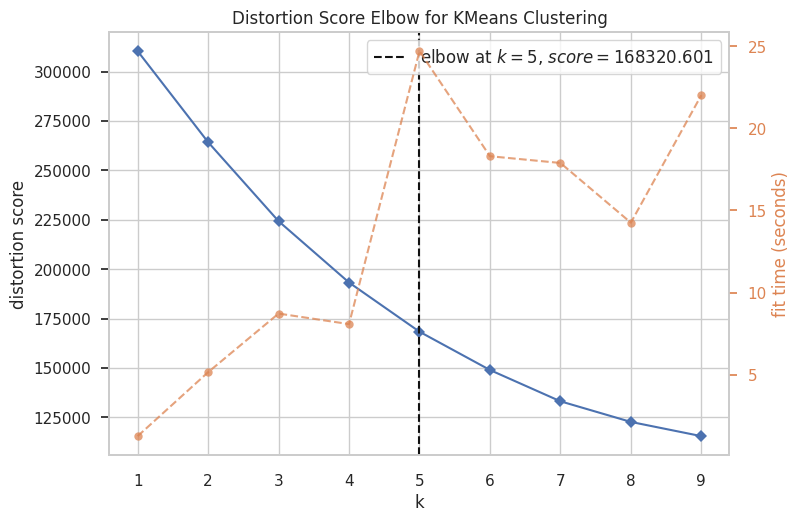

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
modelKmeans = KMeans()
elbow = KElbowVisualizer(modelKmeans,k=(1,10))
elbow.fit(df2.iloc[:,:])
elbow.poof()

In [ ]:
modelKmeans_ = KMeans(n_clusters=5,random_state=2000)
modelKmeans_.fit(df2)

KMeans(n_clusters=5, random_state=2000)

In [ ]:
df['label'] = modelKmeans_.labels_

In [ ]:
df.groupby('label').mean()

,Item Code,Quantity,price per Unit,Shipping Location,Cancelled_status,year,month,day
label,,,,,,,,
0,1652.571114,3.755786,376.960714,14.999509,1.0,2017.0,10.005113,13.446680
1,1550.725781,7.298291,332.017306,10.004931,1.0,2017.0,7.253408,15.609241
2,1489.823790,5.722159,392.516695,14.662689,1.0,2016.0,12.000000,15.545537
3,1468.774148,3.978740,399.800046,14.999560,1.0,2017.0,3.876615,17.683530
4,1619.473944,19.925155,183.635632,14.998225,1.0,2017.0,7.631940,16.975825


In [ ]:
df['label'].value_counts()

0    211626
3    168019
4     84508
2     41988
1     31838
Name: label, dtype: int64